# Forest Fire Prediction

# Forest Fire Archive Dataset

### Importing libraries

In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

### Exploratory Data Analysis

In [2]:
forest_data = pd.read_csv("../datasets/fire_archive.csv")
forest_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [3]:
forest_data.shape

(36011, 15)

In [4]:
forest_data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [5]:
forest_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [6]:
forest_data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

<AxesSubplot:>

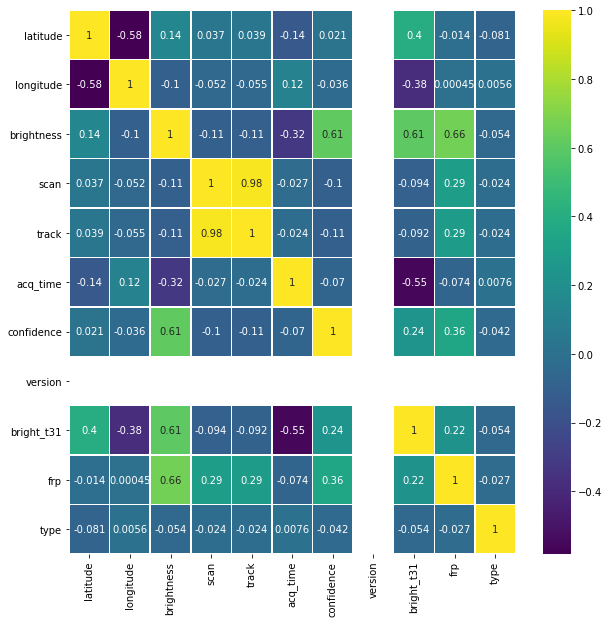

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest_data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [8]:
print("The scan column")
print(forest_data['scan'].value_counts())
print()
print("The aqc_time column")
print(forest_data['acq_time'].value_counts())
print()
print("The satellite column")
print(forest_data['satellite'].value_counts())
print()
print("The instrument column")
print(forest_data['instrument'].value_counts())
print()
print("The version column")
print(forest_data['version'].value_counts())
print()
print("The daynight column")
print(forest_data['daynight'].value_counts())
print()

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.3     203
3.4     203
3.8     189
3.9     156
4.7     149
4.3     137
3.7     134
3.5     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
1808      1
1549      1
246       1
1724      1
1702      1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



In [9]:
forest_data = forest_data.drop(['track'], axis = 1)

In [10]:
forest_data = forest_data.drop(['instrument', 'version'], axis = 1)

In [11]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest_data['daynight'] = forest_data['daynight'].map(daynight_map)
forest_data['satellite'] = forest_data['satellite'].map(satellite_map)

forest_data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


In [12]:
forest_data['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [13]:
types = pd.get_dummies(forest_data['type'])
forest_data = pd.concat([forest_data, types], axis=1)

In [14]:
forest_data = forest_data.drop(['type'], axis = 1)
forest_data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [15]:
forest_data = forest_data.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [16]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest_data['scan_binned'] = pd.cut(forest_data['scan'], bins=bins, labels=labels)

In [17]:
forest_data['acq_date'] = pd.to_datetime(forest_data['acq_date'])

In [18]:
forest_data = forest_data.drop(['scan'], axis = 1)

In [19]:
forest_data['year'] = forest_data['acq_date'].dt.year
forest_data['month'] = forest_data['acq_date'].dt.month
forest_data['day'] = forest_data['acq_date'].dt.day
forest_data.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019,8,1


In [20]:
y = forest_data['confidence']
fin = forest_data.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<AxesSubplot:>

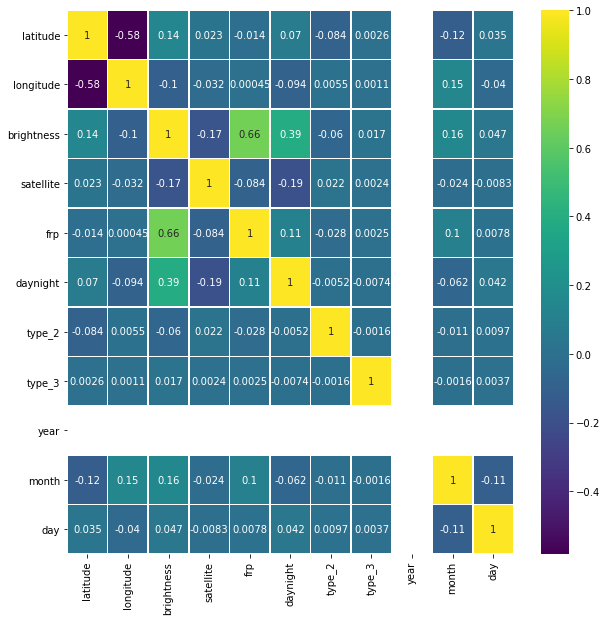

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [22]:
fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,0,0,4,2019,8,1


In [23]:
fin.to_csv("../datasets/fire_archive_final.csv", index=False)

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [25]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [26]:
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = random_model.score(Xtrain, ytrain)
print(random_model_accuracy)

0.9535475797726624


In [27]:
random_model_accuracy_test = random_model.score(Xtest, ytest)
print(random_model_accuracy_test)

0.6412556132552568


# UCI Dataset

### Data Preprocessing

In [28]:
dataset = pd.read_csv("../datasets/forestfiresuci.csv")
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [29]:
X = dataset.iloc[:, 0:12].values
Y = dataset.iloc[:, 12].values

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_x_1 = LabelEncoder()
X[:, 2] = labelencoder_x_1.fit_transform(X[:, 2])

labelencoder_x_2 = LabelEncoder()
X[:, 3] = labelencoder_x_2.fit_transform(X[:, 3])

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X[:, 1:]

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X[:, 1:]

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

### Model Training

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train

array([[ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646],
       [ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646],
       [ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646],
       ...,
       [ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646],
       [ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646],
       [ 0.30901572, -0.30901572,  0.42823018, ..., -0.04926646,
         0.04926646, -0.04926646]])

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE = ", mean_squared_error(y_pred, Y_test))
print("MAE = ", mean_absolute_error(y_pred, Y_test))
print("R2 Score = ", r2_score(y_pred, Y_test))

MSE =  1.894623559438125e+29
MAE =  258045946709904.47
R2 Score =  -0.00044552367642869406


### Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor as dtr

reg = dtr(random_state = 42)
reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
Y_pred = reg.predict(X_test)


print("MSE = ", mean_squared_error(Y_pred, Y_test))
print("MAE = ", mean_absolute_error(Y_pred, Y_test))
print("R2 Score = ", r2_score(Y_pred, Y_test))

MSE =  5431.179746153845
MAE =  16.69538461538462
R2 Score =  -24.498042243514007


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor as rfr

ranfor = rfr(max_depth = 2, random_state = 0, n_estimators = 100)
ranfor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [40]:
Y_pred_rfr = ranfor.predict(X_test)


print("MSE = ", mean_squared_error(Y_pred_rfr, Y_test))
print("MAE = ", mean_absolute_error(Y_pred_rfr, Y_test))
print("R2 Score = ", r2_score(Y_pred_rfr, Y_test))

MSE =  5719.689967544234
MAE =  17.606124683262802
R2 Score =  -7870.322723250627


### Random Forest Classifier & Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%config InlineBackend.rc

{'figure.figsize': (6.0, 4.0),
 'figure.facecolor': (1, 1, 1, 0),
 'figure.edgecolor': (1, 1, 1, 0),
 'font.size': 10,
 'figure.dpi': 72,
 'figure.subplot.bottom': 0.125}

In [42]:
data = pd.read_csv("../datasets/forestfiresuci.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [43]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [44]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<ipython-input-45-d3112a0f3af7>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = a1, bins = 18)


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

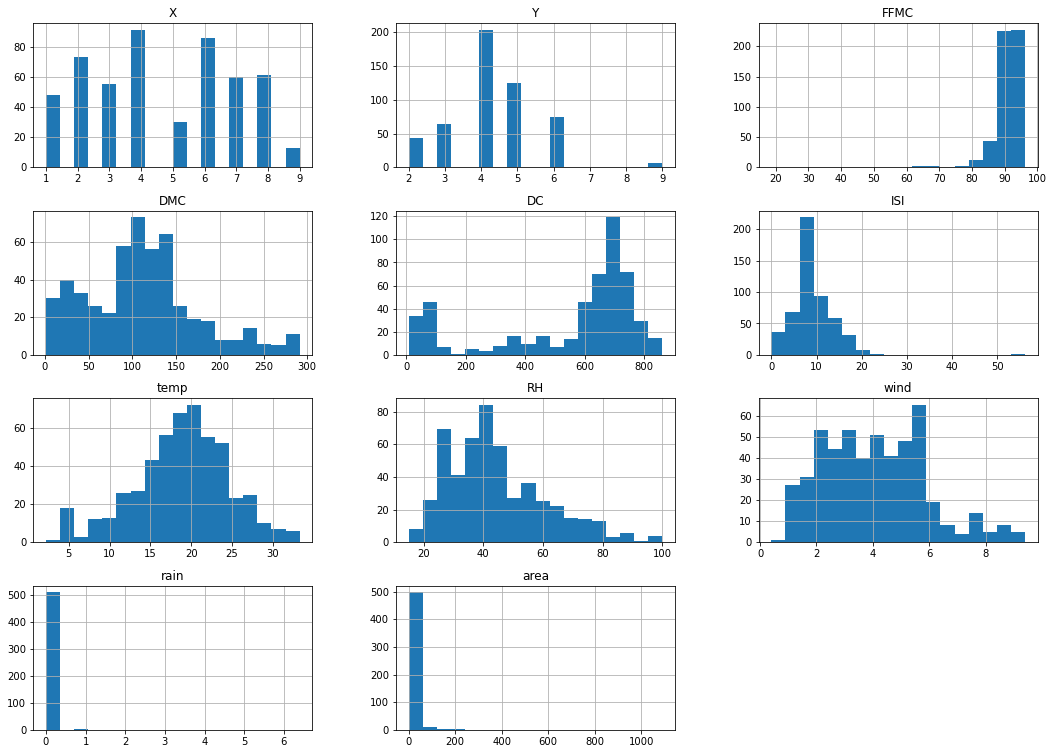

In [45]:
plt1 = plt.figure(figsize = (18,13))
a1 = plt1.gca()
data.hist(ax = a1, bins = 18)

In [46]:
df = data.drop(columns = 'area')

cat_col = df.select_dtypes(include='object').columns.tolist()

cat_col

['month', 'day']

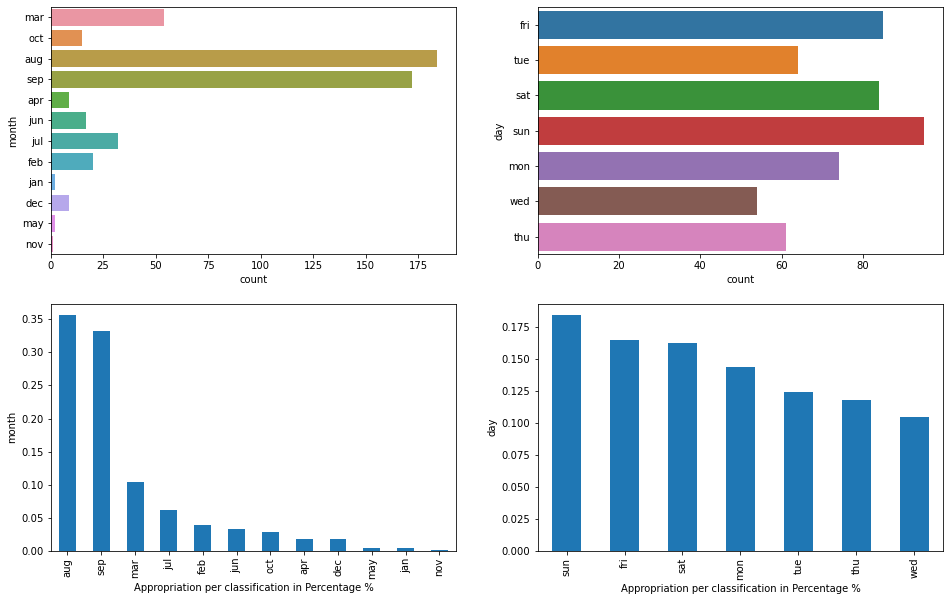

In [47]:
plt.figure(figsize = (16, 10))

for i, col in enumerate(cat_col, 1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, y = col)
    plt.subplot(2,2,i+2)
    data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel("Appropriation per classification in Percentage %")
plt.show()

In [48]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [49]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [50]:
corr1 = data.corr()
corr1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


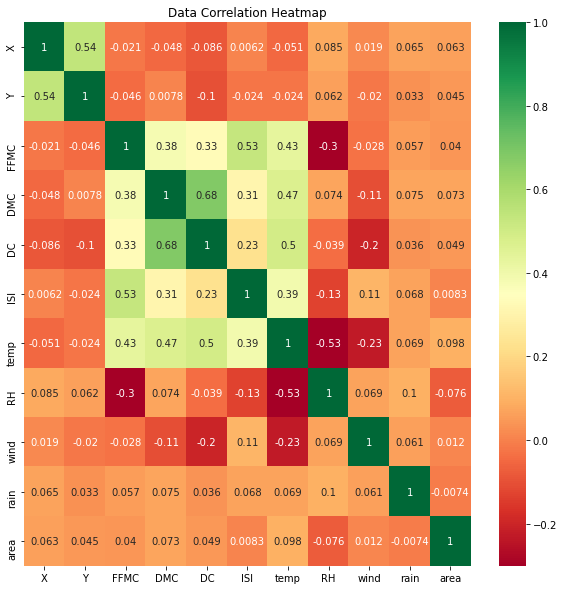

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(corr1, annot = True, cmap = 'RdYlGn', robust = True)
plt.title("Data Correlation Heatmap")
plt.show()

<AxesSubplot:title={'center':'Fire on Land Coordinated for Months'}, xlabel='X', ylabel='Y'>

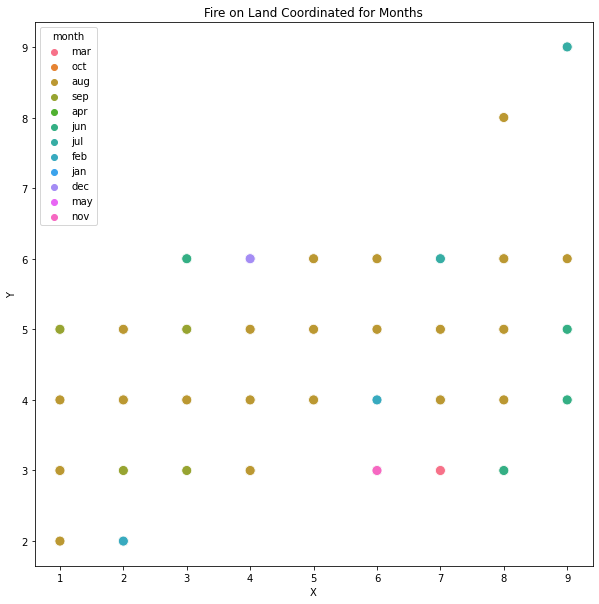

In [52]:
plt.figure(figsize = (10,10))
plt.title("Fire on Land Coordinated for Months")

sns.scatterplot(x = data['X'], y = data['Y'], hue = data['month'], s = 100)

<AxesSubplot:title={'center':'Scatter Plot'}, xlabel='temp', ylabel='wind'>

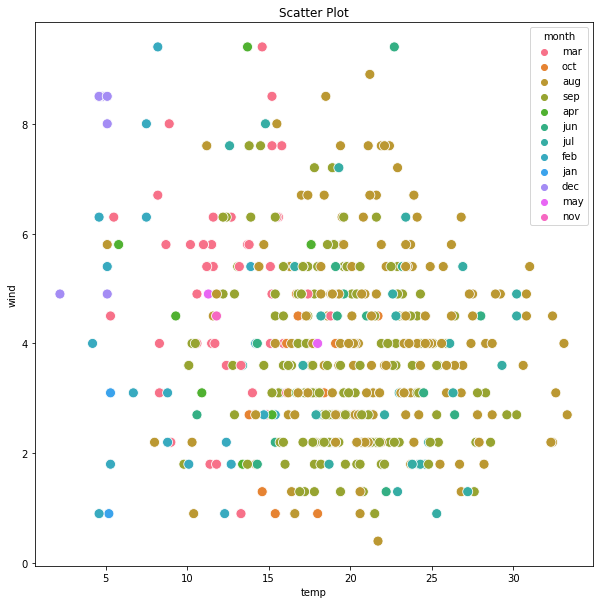

In [53]:
plt.figure(figsize = (10,10))
plt.title("Scatter Plot")

sns.scatterplot(x = data['temp'], y = data['wind'], hue = data['month'], s = 100)

In [54]:
data.day.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1,2,3,4,5,6,7), inplace = True)
data.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)

In [55]:
def pred_training(data):
    data = data.copy()
    
    i = data['month']
    j = data.drop('month', axis = 1)
    
    i_train, i_test, j_train, j_test = train_test_split(j, i, train_size = 0.9, shuffle = True, random_state = 1)
    
    scaler = StandardScaler()
    scaler.fit(i_train)
    
    i_train = pd.DataFrame(scaler.transform(i_train), index = i_train.index, columns = i_train.columns)
    i_test = pd.DataFrame(scaler.transform(i_test), index = i_test.index, columns = i_test.columns)
    
    return i_train, i_test, j_train, j_test

In [56]:
i_train, i_test, j_train, j_test = pred_training(data)

In [57]:
i_train

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
147,1.423235,-1.085877,-1.104414,-1.067596,-0.546209,0.534071,-1.240533,0.903235,-0.996505,-0.221057,-0.075925,-0.186707
399,1.854940,0.550858,-0.620843,0.478976,-0.924489,-0.953988,1.094796,1.544927,-0.622010,0.288653,-0.075925,-0.203419
289,0.991529,-0.267509,0.829871,0.183563,-0.058719,-0.249328,0.013625,0.920122,-0.871673,-1.240476,-0.075925,-0.203419
385,-1.166997,-0.267509,1.313442,0.183563,1.161590,0.299846,-0.289103,0.345976,0.376642,-1.013939,-0.075925,0.075115
67,-1.166997,-1.904245,0.346299,0.322581,0.158119,0.518562,0.705575,0.126450,-0.684426,0.798363,-0.075925,-0.203419
...,...,...,...,...,...,...,...,...,...,...,...,...
129,-1.166997,0.550858,1.313442,0.357335,-0.971972,0.613206,-0.029622,-0.582789,-0.559594,-1.750186,-0.075925,-0.203419
144,-1.166997,0.550858,-0.620843,0.861275,-0.126777,-0.096625,0.921809,0.835689,-0.746842,0.798363,-0.075925,-0.190015
72,0.128119,-0.267509,0.346299,0.200940,-1.180896,-1.829645,0.013625,-0.549015,-1.183752,1.308072,-0.075925,-0.203419
235,1.423235,1.369226,1.313442,0.148809,0.545896,0.253717,0.359600,0.126450,-0.185100,1.024900,-0.075925,3.216978


In [58]:
j_train

147     9
399     6
289     7
385     8
67      9
       ..
129    10
144     8
72      3
235     8
37     10
Name: month, Length: 465, dtype: int64

In [59]:
res = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

for type2, result in res.items():
    result.fit(i_train, j_train)
    
    r1 = result.score(i_test, j_test)
    
    print("{:.3f} % : ".format(r1*100) + type2)

88.462 % : Random Forest
90.385 % : Gradient Boost


In [60]:
import joblib
joblib.dump(random_model, 'model_jlib')

['model_jlib']